(x0)' = -9.969 x0 + 9.971 x1
(x1)' = 27.537 x0 + -0.895 x1 + -0.986 x0 x2
(x2)' = -0.115 1 + -2.656 x2 + 0.997 x0 x1


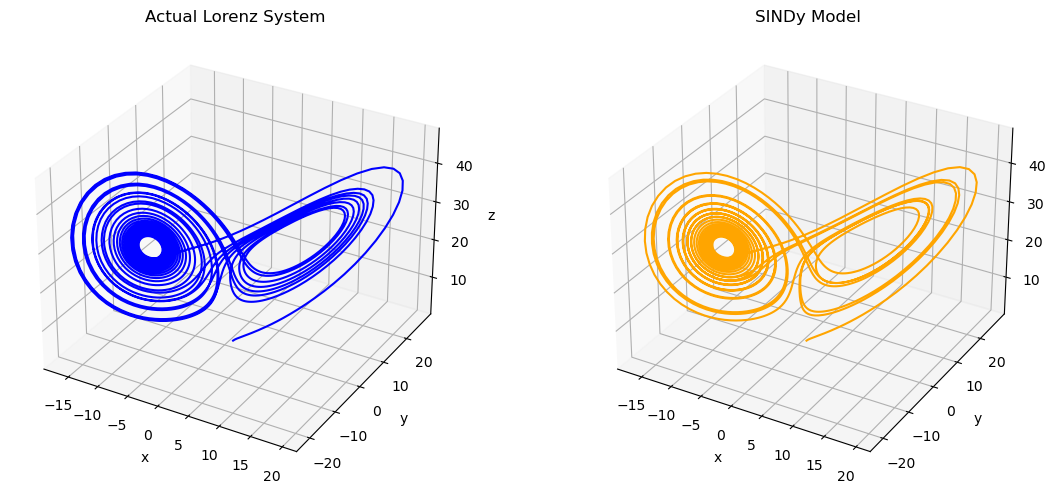

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import pysindy as ps

# Lorenz system
def lorenz(t, xyz, sigma=10, beta=8/3, rho=28):
    x, y, z = xyz
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# Simulate the actual system
t_span = (0, 25)
dt = 0.01
t_eval = np.arange(t_span[0], t_span[1], dt)
initial_condition = [1.0, 1.0, 1.0]
actual_solution = solve_ivp(lorenz, t_span, initial_condition, t_eval = t_eval)
x_actual = actual_solution.y.T

# Add noise
noise_strength = 0.09
x_noisy = x_actual + noise_strength * np.random.randn(*x_actual.shape)

# Fit SINDy model
model = ps.SINDy()
model.fit(x_noisy, t = dt)
model.print()

# Simulate SINDy model
x_sindy = model.simulate(initial_condition, t_eval)

# Plot comparison of actual system vs SINDy model
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(121, projection = '3d')
ax1.plot(*x_actual.T, color = 'blue', label = 'Actual')
ax1.set_title("Actual Lorenz System")
ax1.set_xlabel("x"); ax1.set_ylabel("y"); ax1.set_zlabel("z")

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot(*x_sindy.T, color = 'orange', label = 'SINDy')
ax2.set_title("SINDy Model")
ax2.set_xlabel("x"); ax2.set_ylabel("y"); ax2.set_zlabel("z")

plt.tight_layout()
plt.show()


In [2]:
from sklearn.metrics import mean_squared_error

# Compute MSE per variable and total
mse_x = mean_squared_error(x_actual[:, 0], x_sindy[:, 0])
mse_y = mean_squared_error(x_actual[:, 1], x_sindy[:, 1])
mse_z = mean_squared_error(x_actual[:, 2], x_sindy[:, 2])
mse_total = mean_squared_error(x_actual, x_sindy)

# Print MSE results
print("\nMean Squared Error (MSE) between actual Lorenz system and SINDy model:")
print(f"  x: {mse_x:.4f}")
print(f"  y: {mse_y:.4f}")
print(f"  z: {mse_z:.4f}")
print(f"  Total (all variables): {mse_total:.4f}")


Mean Squared Error (MSE) between actual Lorenz system and SINDy model:
  x: 76.8275
  y: 97.9506
  z: 100.1591
  Total (all variables): 91.6457


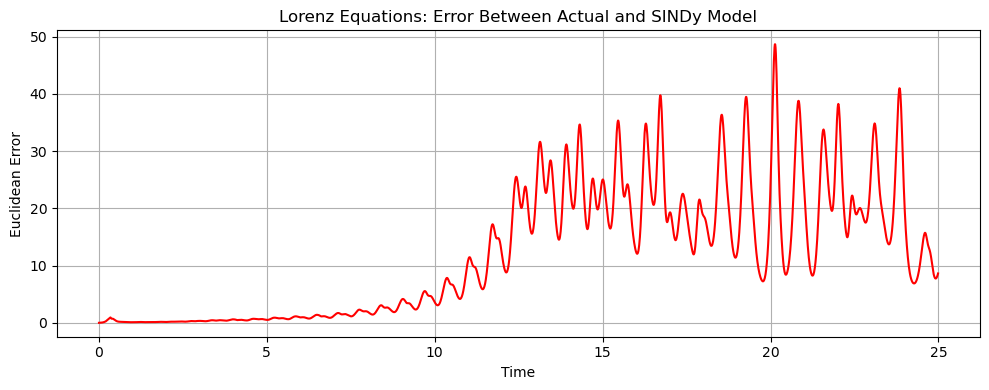

In [3]:
# Compute error as the Euclidean norm at each time step
errors = np.linalg.norm(x_actual - x_sindy, axis=1)

# Plot the error over time
plt.figure(figsize=(10, 4))
plt.plot(t_eval, errors, color='red')
plt.title("Lorenz Equations: Error Between Actual and SINDy Model")
plt.xlabel("Time")
plt.ylabel("Euclidean Error")
plt.grid(True)
plt.tight_layout()
plt.show()

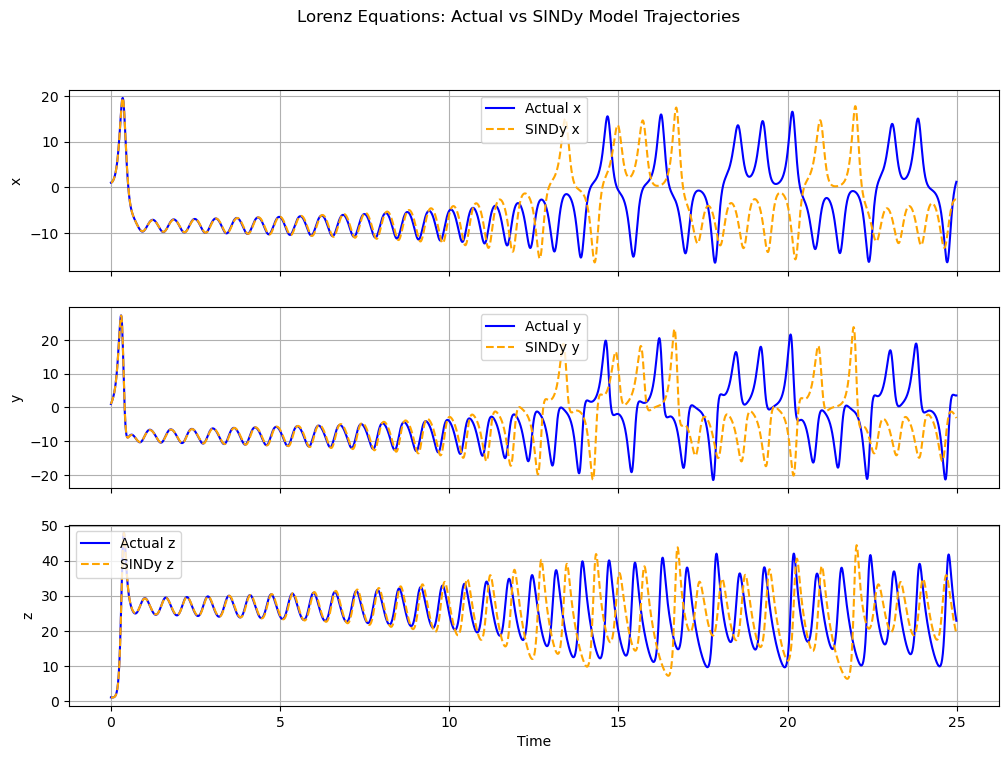

In [4]:
# Plot actual vs SINDy values for each variable
fig, axs = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

labels = ['x', 'y', 'z']
for i in range(3):
    axs[i].plot(t_eval, x_actual[:, i], label=f'Actual {labels[i]}', color='blue')
    axs[i].plot(t_eval, x_sindy[:, i], label=f'SINDy {labels[i]}', color='orange', linestyle='dashed')
    axs[i].set_ylabel(labels[i])
    axs[i].legend()
    axs[i].grid(True)

axs[2].set_xlabel('Time')
plt.suptitle('Lorenz Equations: Actual vs SINDy Model Trajectories')
plt.tight_layout
plt.show()